In [6]:
import os
os.environ["XLA_PYTHON_CLIENT_PREALLOCATE"] = "false"
import matplotlib.pyplot as plt
import numpy as np
from rasp_tokenizer import paths
from rasp_tokenizer import tokenizer
import pickle
import json
import seaborn as sns
sns.set()
sns.color_palette('pastel')

FIGSIZE = np.array((4.4, 3))
FIGPATH = "../../writeups/icml2024-inverse-tracr/figures/"
#SAVE = False
SAVE = True

In [7]:
datapath = paths.data_dir / "metrics"
! ls {datapath}

lib-metrics-by-category-autoregressive.json
lib-metrics-by-category.json
metrics-lib.pkl
test-metrics-by-category-autoregressive.json
test-metrics-by-category.json


In [8]:
with open(datapath / "test-metrics-by-category.json", "r") as f:
    metrics = json.load(f)
print(metrics.keys())


with open(datapath / "test-metrics-by-category-autoregressive.json", "r") as f:
    ar_metrics = json.load(f)
print(metrics.keys())

dict_keys(['encodings', 'ops', 'maps', 'variables', 'comparisons', 'Map', 'SequenceMap (both)', 'LinearSequenceMap', 'SequenceMap', 'SelectAggregate', 'SelectorWidth'])
dict_keys(['encodings', 'ops', 'maps', 'variables', 'comparisons', 'Map', 'SequenceMap (both)', 'LinearSequenceMap', 'SequenceMap', 'SelectAggregate', 'SelectorWidth'])


## Accuracy by token type

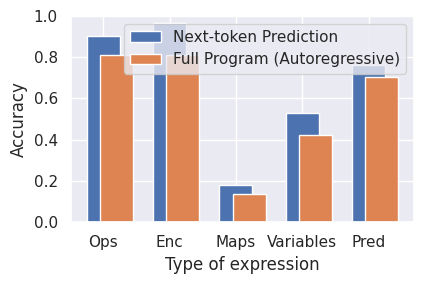

In [18]:
plt.figure(figsize=FIGSIZE)

plt.plot()
plt.ylabel("Accuracy")
plt.xlabel("Type of expression")


to_plot    = ["ops", 'encodings', 'maps', 'variables', 'comparisons']
ticklabels = ["Ops", "Enc",       "Maps",  "Variables", "Pred"]
plt.xticks(range(len(ticklabels)), ticklabels);

bar_positions = np.arange(len(to_plot))
bar_width = 0.2

plot_data = {
    k: v for k, v in metrics.items() if k in to_plot
}

ar_plot_data = {
    k: v for k, v in ar_metrics.items() if k in to_plot
}



ax = plt.gca()
ax.bar(bar_positions, plot_data.values(), width=0.5, label="Next-token Prediction")
ax.bar(bar_positions+bar_width, ar_plot_data.values(), width=0.5, label="Full Program (autoregressive)")
ax.legend()


plt.ylim(0.0, 1)

plt.tight_layout()

figname = "acc-by-token-type.pdf"

if SAVE:
    plt.savefig(FIGPATH+figname, bbox_inches="tight")

## Accuracy by SOp type

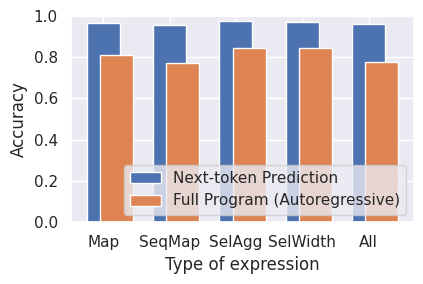

In [17]:
plt.figure(figsize=FIGSIZE)

plt.plot()
plt.ylabel("Accuracy")
plt.xlabel("Type of expression")


to_plot    = ["Map", 'SequenceMap (both)',  'SelectAggregate', 'SelectorWidth', "ops"]
ticklabels = ["Map", "SeqMap",              "SelAgg",          "SelWidth",    "All"]
plt.xticks(range(len(ticklabels)), ticklabels);

bar_positions = np.arange(len(to_plot))

plot_data = {
    k: v for k, v in metrics.items() if k in to_plot
}

ar_plot_data = {
    k: v for k, v in ar_metrics.items() if k in to_plot
}

ax = plt.gca()
ax.bar(bar_positions, plot_data.values(), width=0.5, label="Next-token Prediction")
ax.bar(bar_positions+bar_width, ar_plot_data.values(), width=0.5, label="Full Program (autoregressive)")
ax.legend(loc="lower right")


plt.ylim(0.0, 1)

plt.tight_layout()

figname = "acc-by-sop.pdf"

if SAVE:
    plt.savefig(FIGPATH+figname, bbox_inches="tight")

In [11]:
# load from wandb
import wandb

api = wandb.Api()
run_id = "a6d2m8uk"
run = api.run(f"lauro/inverse-tracr/{run_id}")

In [12]:
his = run.history()

In [13]:
his

,test_5/loss,grad_norm,lib/program_accuracy,_step,test_5/program_accuracy_50,_timestamp,test_5/accuracy,val/accuracy,test_5/program_accuracy,_runtime,...,lib/program_accuracy_50,weight_norm,opt/clip_value,test_5/program_accuracy_90,val/program_accuracy_90,val/program_accuracy_50,opt/lr,val/program_accuracy,step,opt/wd
0,6.236119,NaN,0.0,1,0.0,1.706813e+09,0.000000,0.000000,0.0,14.313049,...,0.0,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.0,1,NaN
1,NaN,6.845985,NaN,2,NaN,1.706813e+09,NaN,NaN,NaN,21.307429,...,NaN,63.083954,20.0,NaN,NaN,NaN,0.000000e+00,NaN,2,0.0001
2,NaN,7.387732,NaN,4,NaN,1.706813e+09,NaN,NaN,NaN,21.324341,...,NaN,63.083954,20.0,NaN,NaN,NaN,1.280000e-08,NaN,4,0.0001
3,NaN,7.125830,NaN,8,NaN,1.706813e+09,NaN,NaN,NaN,21.350351,...,NaN,63.083954,20.0,NaN,NaN,NaN,3.840000e-08,NaN,8,0.0001
4,NaN,6.928375,NaN,16,NaN,1.706813e+09,NaN,NaN,NaN,21.398165,...,NaN,63.083954,20.0,NaN,NaN,NaN,8.959999e-08,NaN,16,0.0001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,0.507142,3.543868,0.0,147169,1.0,1.706814e+09,0.856749,0.779637,0.0,1030.302164,...,1.0,110.053223,20.0,0.306480,0.410988,0.965311,9.999999e-05,0.0,147169,0.0001
104,0.501703,3.593491,0.0,148702,1.0,1.706814e+09,0.858758,0.779658,0.0,1040.978416,...,1.0,110.152954,20.0,0.321518,0.409403,0.965839,9.999999e-05,0.0,148702,0.0001
105,0.513223,3.666487,0.0,150235,1.0,1.706814e+09,0.857721,0.779580,0.0,1051.520094,...,1.0,110.253227,20.0,0.315073,0.410107,0.965487,9.999999e-05,0.0,150235,0.0001
106,0.514425,3.655854,0.0,151768,1.0,1.706814e+09,0.857440,0.778798,0.0,1061.957142,...,1.0,110.350792,20.0,0.307913,0.409579,0.965311,9.999999e-05,0.0,151768,0.0001


In [14]:
len(his["val/loss"])

108

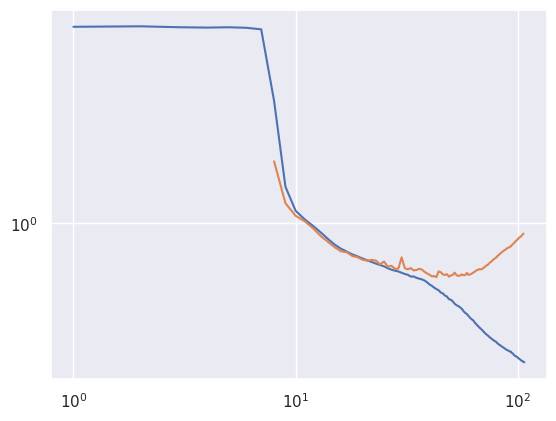

In [15]:
plt.plot(his['train/loss'])
plt.plot(his['val/loss'])
plt.yscale("log")
plt.xscale("log")

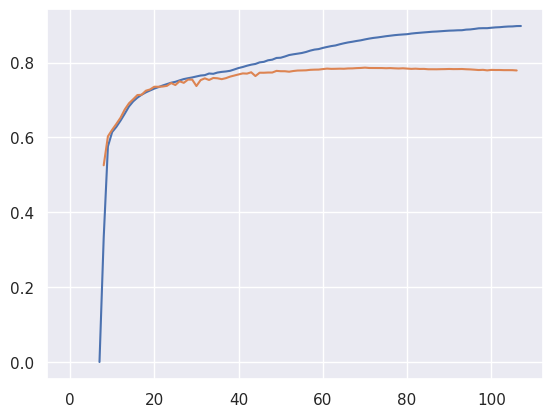

In [16]:
plt.plot(his['train/accuracy'][7:])
plt.plot(his['val/accuracy'])